In [2]:
#FIRSTLY IMPORTING THE LIBRARY PANDAS FOR READING THE DATASET
import pandas as pd

# LOADING AND PRINTING THE DATASET
#CURRENTLY PRINTING THE HEAD TO KNOW ABOUT THE DATA SET VALUES IN EACH COLUMN FOR AN EXAMPLE THAT THE VALUES ARE IN STRING OR NUMBERS
data_set = pd.read_csv('mushrooms.csv.csv')
print(data_set.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



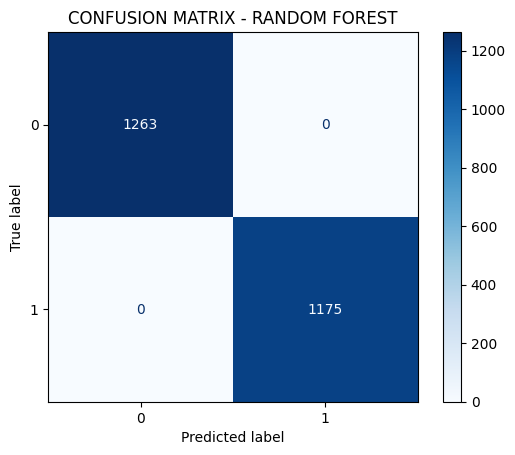

In [12]:
#IMPORTING SKLEARN LIBRARY AND MODEL TRAIN TEST SPLIT FOR SPLITTING THE DATA SET INTO TESTING AND TRAINING.
from sklearn.model_selection import train_test_split

#IMPORTING LABEL ENCODER FROM SKLEARN LIBRARY TO CONVERT THE STRINGS IN THE DATASET INTO NUMBERS 
#BECAUSE MACHINE LEARNING MODELS ONLY UNDERSTANDS NUMBERS
from sklearn.preprocessing import LabelEncoder

#IMPORTING THE ALGORITHM DECISION TREE CLASSIFIFER FROM SKLEARN LIBRARY TO TRAIN THE MODEL.
from sklearn.tree import DecisionTreeClassifier

#IMPORTING THE ALGORITHM RANDOM FOREST CLASSIFIFER FROM SKLEARN LIBRARY TO TRAIN THE MODEL.
from sklearn.ensemble import RandomForestClassifier

#IMPORTING CLASSIFICATION REPORT , CONFUSION MATRIX AND CONFUSION MATRIX DISPLAY FROM SKLEARN LIBRARY TO EVALUATE THE MODEL, 
#MAINLY TO KNOW HOW THE MODEL PERFORMED AND ACCURACY TEST
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

#IMPORTING PYPLOT FROM MATPLOTLIB LIBRARY FOR GRAPHICAL REPRESENTATION
import matplotlib.pyplot as plt



# ENCODING CATEGORICAL FEATURES USING LABEL ENCODER
#USING THE FOR LOOP FOR ITERATION BECAUSE OF THE DATA SET, THAT IT INVOLVES LARGE NUMBER OF DATAS. 
#THIS LOOP ITERATE FROM THE DATA TO DATA IN ALL COULUMNS IN THE DATA SET.
#THE FIT TRANFORM WILL SCAN THE STRINGS AND REPLACES IT WITH NUMBERS
label_encoders = {}
for col in data_set.columns:
    le = LabelEncoder()
    data_set[col] = le.fit_transform(data_set[col])
    label_encoders[col] = le


# SPLITTING THE FEATURES AND VARIABLES EXCEPT THE TARGET VARIABLE NAME "CLASS"
#AND y IS THE TARGET VARIABLE THAT WE NEED TO PREDICT
X = data_set.drop('class', axis=1)
y = data_set['class']

# TRAINING DATA AND TESTING DATA SPLITTING
#70% OF OUR DATA GOES INTO TRAINING AND 30% DATA INTO TESTING.
#YOU CAN CHANGE THE TRAIN AND TEST TO SEE DIFFERENT RESULTS.
#RANDOM STATE IS TO MAKE SURE THAT THE SPLIT IS REPRODUCIBLE.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

#================================================================
# RANDOM FOREST CLASSIFIER
#================================================================

# TRAINING THE MODEL USING THE ALGORITHM RANDOM FOREST CLASSIFIER.
#CALLING THE ALGORITHM INTO MODEL.
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

#FINAL STAGE :- EVALUATING THE MODEL PERFORMANCE AND MAKING PREDICTIONS
#MAKING PREDICTIONS IN _PRED VARIABLE
#EVALUATING THE MODEL PERFORMANCE BY MEASURING THE MODEL ACCURACY , PRECISION ETC. AND THE MODEL IS 100% PERFECTLY FITTED AND ACCURATED.
random_forest_pred = random_forest_model.predict(X_test)
print(classification_report(y_test, random_forest_pred))


#CONFUSION MATRIX

cm_random_forest = confusion_matrix(y_test, random_forest_pred)
disp_random_forest = ConfusionMatrixDisplay(confusion_matrix = cm_random_forest, display_labels = random_forest_model.classes_)
disp_random_forest.plot(cmap = plt.cm.Blues)
plt.title("CONFUSION MATRIX - RANDOM FOREST")
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



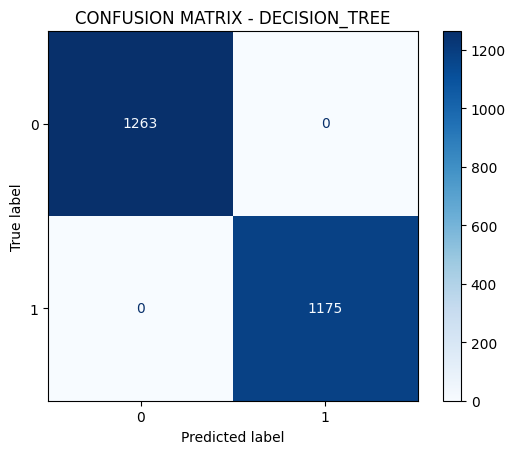

In [8]:
# TRAINING THE MODEL USING THE ALGORITHM DECISION TREE CLASSIFIER.
#CALLING THE ALGORITHM INTO MODEL.
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

#FINAL STAGE :- EVALUATING THE MODEL PERFORMANCE AND MAKING PREDICTIONS
#MAKING PREDICTIONS IN Y_PRED VARIABLE
#EVALUATING THE MODEL PERFORMANCE BY MEASURING THE MODEL ACCURACY , PRECISION ETC. AND THE MODEL IS 100% PERFECTLY FITTED AND ACCURATED.
decision_tree_pred = decision_tree_model.predict(X_test)
print(classification_report(y_test, decision_tree_pred))



#CONFUSION MATRIX

cm_decision_tree = confusion_matrix(y_test, decision_tree_pred)
disp_decision_tree = ConfusionMatrixDisplay(confusion_matrix = cm_decision_tree, display_labels = decision_tree_model.classes_)
disp_decision_tree.plot(cmap = plt.cm.Blues)
plt.title("CONFUSION MATRIX - DECISION_TREE")
plt.show()